In [1]:
# import numpy, pandas, pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define a function that given the background fields it makes the plots
def plotBackgroundFields(data_frame, figpath = ""):
    """
        Plots the background fields as a function of A.
        data_frame: Pandas DataFrame object that contains the values
        of A and of q, Phi and tau in its columns
    """
    fields = ["q", "Phi", "tau"]
    A = data_frame["A"]
    for field in fields:
        plt.plot(A, data_frame[field], label = field + "(A)")
        plt.xlabel("A")
        plt.ylabel(field)
        plt.legend()
        if len(figpath) != 0 :
            plt.savefig(field + figpath + ".pdf")
        plt.show()
        
# Define a function that given the background potentials it makes the plots
def plotBackgroundPotentials(data_frame, figpath = ""):
    """
        Plots the background potentials as a function of A.
        data_frame: Pandas DataFrame object that contains the values
        of A and of Vg, Vf, k and w in its columns
    """
    potentials = ["Vg", "Vf", "k", "w"]
    A = data_frame["A"]
    for potential in potentials:
        plt.plot(A, data_frame[potential], label = potential + "(A)")
        plt.xlabel("A")
        plt.ylabel(potential)
        plt.legend()
        if len(figpath) != 0 :
            plt.savefig(potential + figpath + ".pdf")
        plt.show()

# Define a function that given the schrodinger potentials it makes the plots
def plotSchrodingerPotentials(data_frame, figpath = ""):
    """
        Plots the schrodinger potentials as a function of u.
        data_frame: Pandas DataFrame object that contains the values
        of u and of VVM, VAVM, VPSM, VSM and VSAVM its columns
    """
    potentials = ["VVM", "VAVM", "VPSM", "VSM", "VSAVM"]
    u = data_frame["u"][data_frame["u"] > 0.1][data_frame["u"] < 10]
    for potential in potentials:
        plt.plot(u, data_frame[potential][data_frame["u"] > 0.1][data_frame["u"] < 10],
                 label = potential + "(u)")
        plt.xlabel("u")
        plt.ylabel(potential)
        plt.legend()
        if len(figpath) != 0 :
            plt.savefig(potential + figpath + ".pdf")
        plt.show()

# Define a function that plots Vf / Vg
def plotVfOverVg(data_frame, figpath = ""):
    """
        Plots the ratio Vf / Vg as a function of A.
        data_frame: Pandas DataFrame object that contains the values
        of A and of Vg, Vf, k and w in its columns
    """
    A = np.array(data_frame["A"])
    Vf_over_Vg = np.array(data_frame["Vf"]) / np.array(data_frame["Vg"])
    plt.plot(A, Vf_over_Vg, label = "Vf/Vg")
    plt.xlabel("A")
    plt.ylabel("Vf / Vg")
    plt.legend()
    if len(figpath) != 0 :
        plt.savefig("Vf_over_Vg" + figpath + ".pdf")
    plt.show()
    

def plotConstraintEq(fields_data, pot_data, figpath = ""):
    """
        Plots the constraint equation as a function of A.
        This equation is the one named eomconstr in Matti's notebook.
    """
    A = np.array(fields_data["A"])
    q = np.array(fields_data["q"])
    dPhi = np.array(fields_data["dPhi/dA"])
    dtau = np.array(fields_data["dtau/dA"])
    Vg = np.array(pot_data["Vg"])
    Vf = np.array(pot_data["Vf"])
    k = np.array(pot_data["k"])
    x = 2./3
    eomconstr = (2./3)*dPhi*dPhi + 0.5*q*q*Vg - 6 - 0.5 * x * q * q *Vf / np.sqrt(1+k*dtau*dtau/(q*q))
    plt.plot(A, eomconstr, label = "Constr. Equation")
    plt.xlabel("A")
    plt.ylabel("Constr. Eq")
    plt.legend()
    if len(figpath) != 0 :
        plt.savefig("eomconstr" + figpath + ".pdf")
    plt.show()
    
    
def plotAll(label = ""):
    """
        Loads background fiels, potentials and schrodinger potentials data frames
        and makes the plots for a given set identified by a label.
    """
    # Load background fields data
    background_fields = pd.read_csv("BackgroundFields" + label + ".txt", sep = '\t')
    # Load background potentials data
    background_potentials = pd.read_csv("BackgroundPotentials" + label + ".txt", sep = '\t')
    # Load Schrodinger potentials data
    schrodinger_potentials = pd.read_csv("SchrodingerPotentials" + label + ".txt", sep = '\t')
    # Make the plot of Background fields
    plotBackgroundFields(background_fields, label)
    # Make the plot of Background potentials
    plotBackgroundPotentials(background_potentials, label)
    # Make the plot of the Schrodinger Potentials
    plotSchrodingerPotentials(schrodinger_potentials, label)
    plotVfOverVg(background_potentials, label)
    plotConstraintEq(background_fields, background_potentials, label)

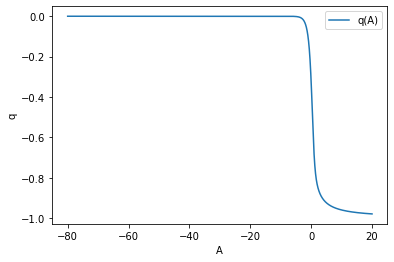

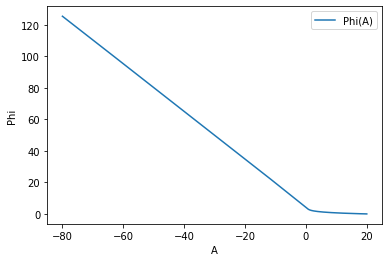

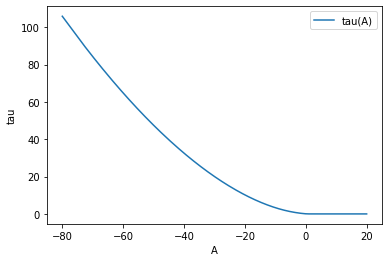

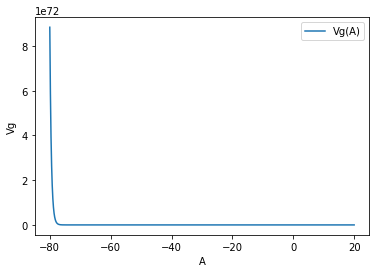

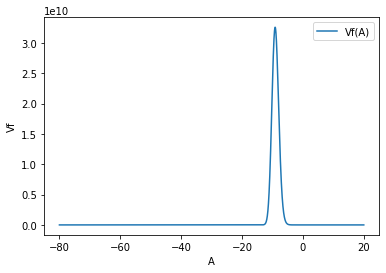

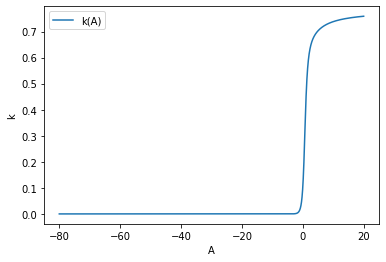

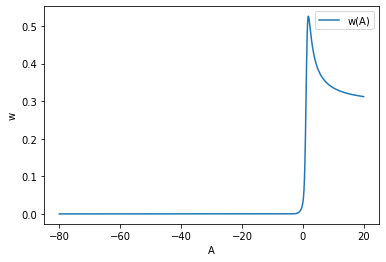

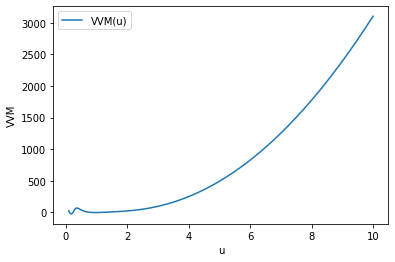

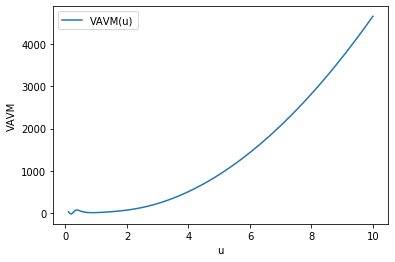

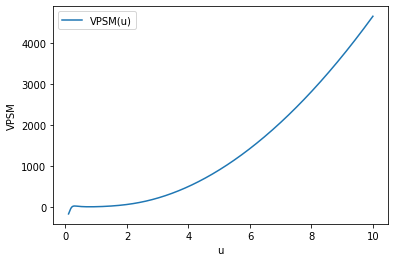

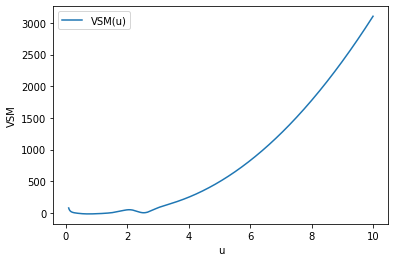

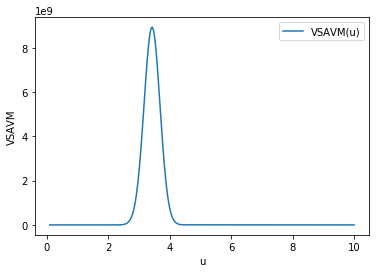

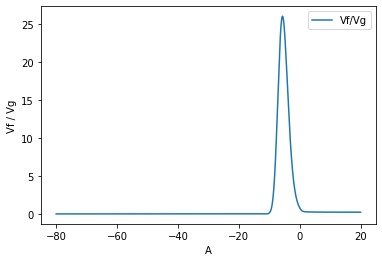

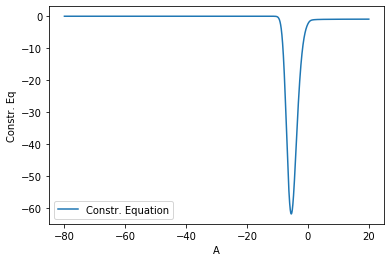

In [3]:
plotAll("_updated_PDG")

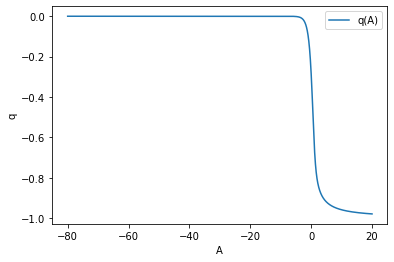

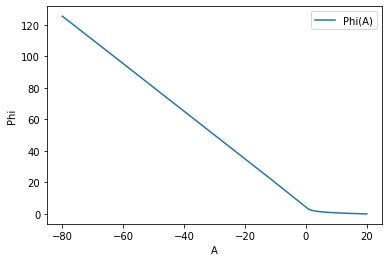

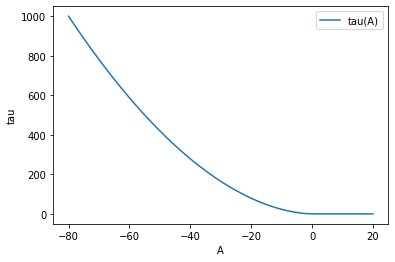

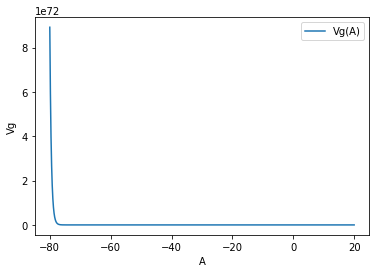

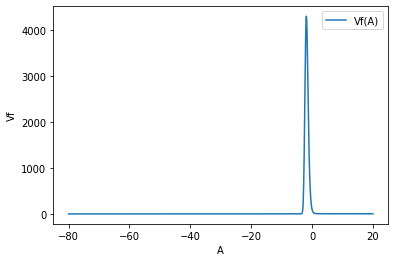

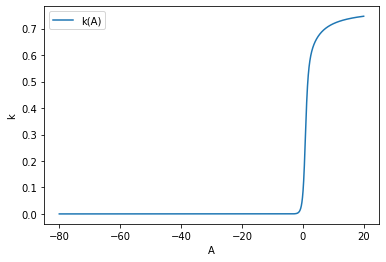

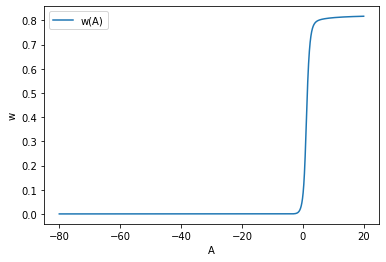

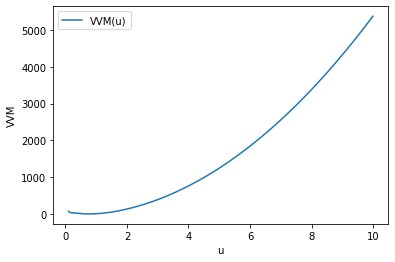

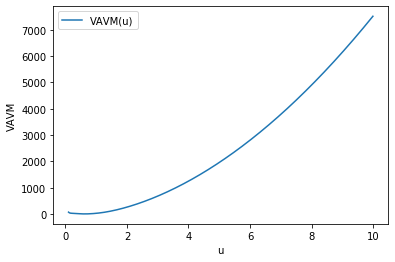

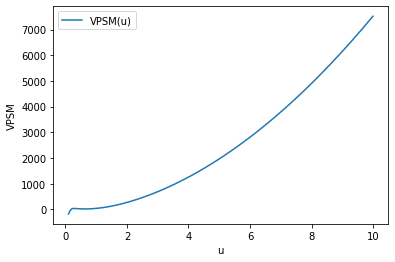

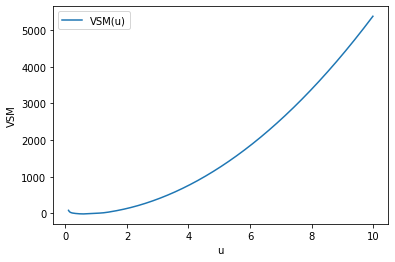

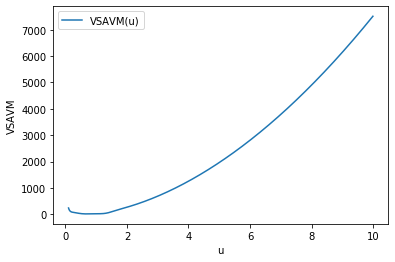

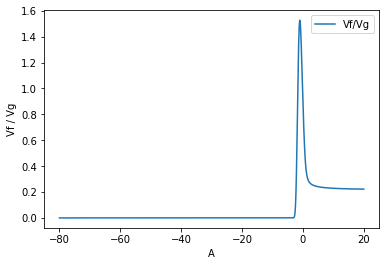

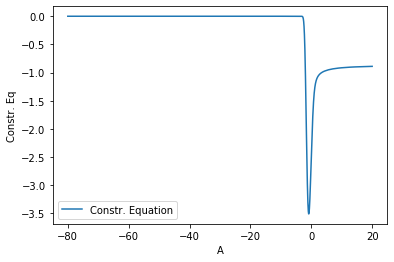

In [4]:
plotAll("_updated_PDG_Witha0")

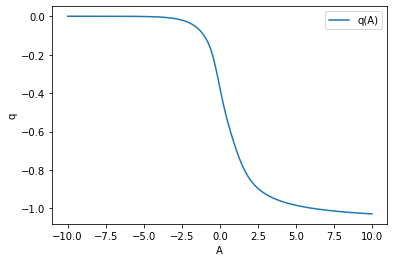

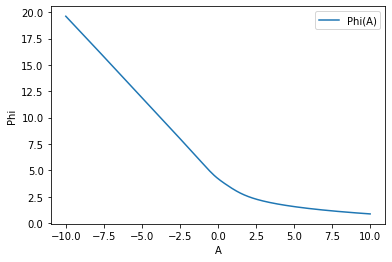

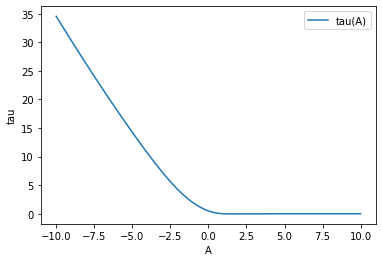

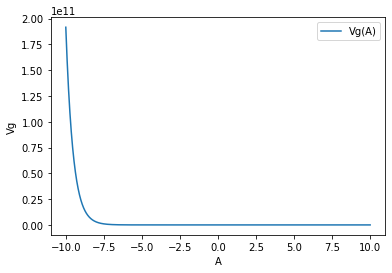

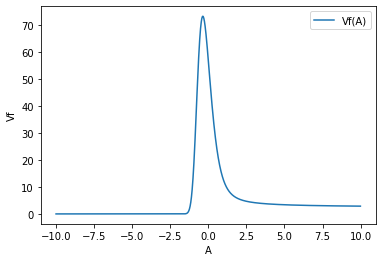

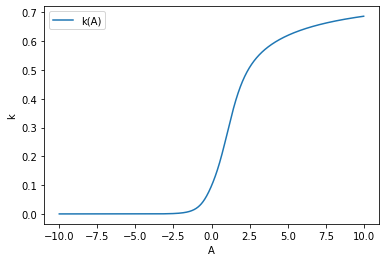

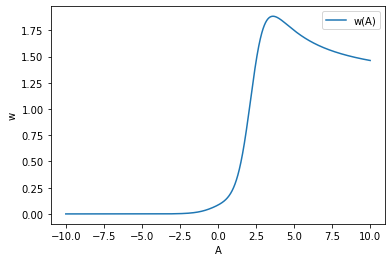

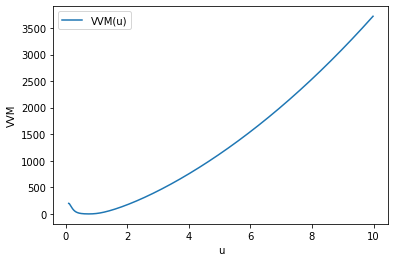

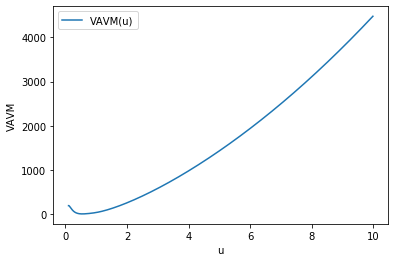

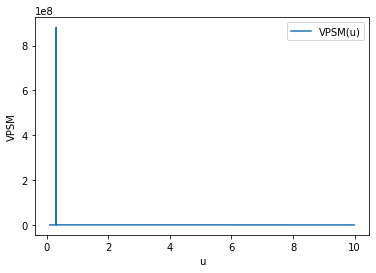

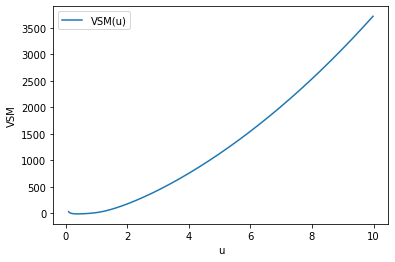

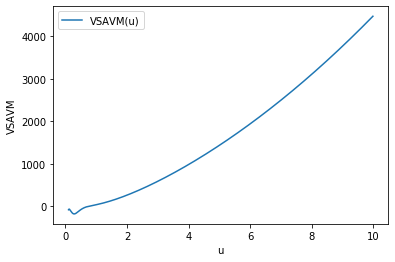

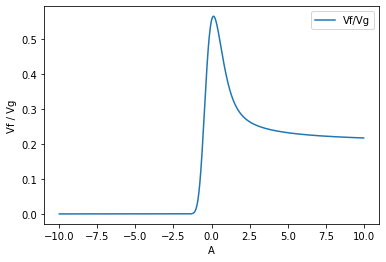

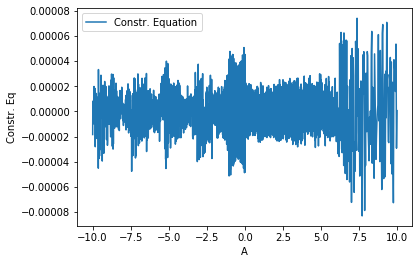

In [5]:
plotAll("_Global_a1_a2_fixed")